9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Saving classic-cheese-pizza-FT-RECIPE0422-31a2c938fc2546c9a07b7011658cfd05.jpg to classic-cheese-pizza-FT-RECIPE0422-31a2c938fc2546c9a07b7011658cfd05.jpg


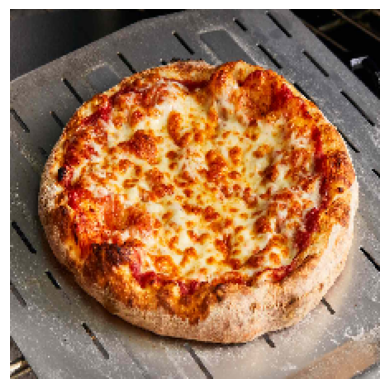

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: pizza (Confidence: 0.73)


In [3]:
# Install necessary libraries
!pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Upload image
uploaded = files.upload()

# Prepare the uploaded image for prediction
for img_name in uploaded.keys():
    img_path = img_name
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = 'pizza' if predictions[0] > 0.5 else 'burger'
    print(f"Predicted class: {predicted_class} (Confidence: {predictions[0][0]:.2f})")
